<a href="https://colab.research.google.com/github/doogzultz/time_series_project/blob/main/preprocessing_and_model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [504]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pandas.plotting import scatter_matrix
from tensorflow.keras.layers import Layer, Dense, Dropout, Input, Flatten, Concatenate, Conv1D, LSTM, Bidirectional, BatchNormalization, Activation, TimeDistributed, Lambda
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [486]:
class g:
  window_size = 16
  batch_size = 16

In [446]:
url = "https://raw.githubusercontent.com/doogzultz/time_series_project/main/data.csv"
data = pd.read_csv(url)

In [447]:
data.columns

Index(['date', 'identifier', 'market_cap', 'sector', 'index_membership',
       'factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5', 'factor_6',
       'factor_7', 'factor_8', 'factor_9', 'factor_10', 'target'],
      dtype='object')

In [448]:
data.drop(columns = 'index_membership', inplace = True)

In [449]:
data.sort_values(by = ['identifier', 'date'], inplace = True)
data

,date,identifier,market_cap,sector,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,factor_9,factor_10,target
82,2010-01-06,AD41WBQFVG43,5.843968e+10,35,0.766639,-0.000032,0.832677,0.500608,0.193489,0.246089,0.753702,0.792736,-0.000005,0.109029,-0.000006
400,2010-01-13,AD41WBQFVG43,4.758865e+10,35,0.907349,-0.022933,0.346457,0.581694,0.648483,0.872304,0.723412,0.333230,-0.009504,0.121348,-0.008721
718,2010-01-20,AD41WBQFVG43,3.374757e+10,35,0.476465,-0.000114,0.592328,0.379747,0.810961,0.017737,0.619208,0.058918,-0.000099,0.890898,-0.000081
1036,2010-01-27,AD41WBQFVG43,4.908395e+10,35,0.265141,-0.000034,0.521405,0.682492,0.547349,0.155915,0.068966,0.699718,-0.000037,0.355059,-0.000018
1354,2010-02-03,AD41WBQFVG43,2.729189e+10,35,0.423987,0.000197,0.950500,0.628533,0.956287,0.426634,0.752799,0.961276,0.000163,0.196711,0.000318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2010-10-06,ZMYXRS4KVOG2,6.504496e+08,25,0.069622,0.009936,0.588354,0.447469,0.353549,0.767779,0.790632,0.308049,0.012255,0.281193,0.005117
12862,2010-10-13,ZMYXRS4KVOG2,1.403710e+09,25,0.343444,0.002566,0.394802,0.143162,0.116762,0.744089,0.825323,0.559633,0.001058,0.755124,0.000446
13172,2010-10-20,ZMYXRS4KVOG2,7.284687e+08,25,0.857557,0.000146,0.892729,0.113346,0.574870,0.990100,0.319424,0.591153,0.000054,0.933679,0.000035
13483,2010-10-27,ZMYXRS4KVOG2,7.766592e+08,25,0.093894,-0.000885,0.311392,0.768537,0.589851,0.289180,0.431484,0.373209,-0.000411,0.225972,-0.000242


In [450]:
ident_counts= data.value_counts('identifier')
ident_counts

identifier
AD41WBQFVG43    104
UZ4DWDZ8ALZ4    104
KR47536Y10D4    104
KPJ8FTV9ESJ3    104
KMHQ727PU8E2    104
               ... 
PNUM57CYEB27      5
KHKNKSMXBWP3      5
LYCPQJ19AOY0      5
RENR64FT3I74      5
LALJLSN9UMP2      2
Length: 356, dtype: int64

In [451]:
data.value_counts('sector', normalize = True).sort_index()

sector
10    0.049221
15    0.093162
20    0.208527
25    0.132849
30    0.072759
35    0.049003
40    0.232812
45    0.051674
50    0.038352
55    0.071642
dtype: float64

In [452]:
data[data['identifier'].isin(list(ident_counts[ident_counts.values > 80].index))].value_counts('sector', normalize = True).sort_index()

sector
10    0.052423
15    0.093655
20    0.212044
25    0.126521
30    0.076618
35    0.045433
40    0.228443
45    0.052423
50    0.039048
55    0.073392
dtype: float64

In [453]:
data[data['identifier'].isin(list(ident_counts[ident_counts.values <= 80].index))].value_counts('sector', normalize = True).sort_index()

sector
10    0.010229
15    0.087152
20    0.165712
25    0.209902
30    0.025777
35    0.092471
40    0.286007
45    0.042553
50    0.029869
55    0.050327
dtype: float64

In [455]:
sector_onehot = pd.get_dummies(data['sector'], prefix='sector')
sector_onehot

,sector_10,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55
82,0,0,0,0,0,1,0,0,0,0
400,0,0,0,0,0,1,0,0,0,0
718,0,0,0,0,0,1,0,0,0,0
1036,0,0,0,0,0,1,0,0,0,0
1354,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12552,0,0,0,1,0,0,0,0,0,0
12862,0,0,0,1,0,0,0,0,0,0
13172,0,0,0,1,0,0,0,0,0,0
13483,0,0,0,1,0,0,0,0,0,0


In [456]:
target = data['target']
data.drop(columns = ['sector', 'target'], inplace = True)
data = pd.concat([data, sector_onehot, target], axis = 1)
data

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
82,2010-01-06,AD41WBQFVG43,5.843968e+10,0.766639,-0.000032,0.832677,0.500608,0.193489,0.246089,0.753702,...,0,0,0,0,1,0,0,0,0,-0.000006
400,2010-01-13,AD41WBQFVG43,4.758865e+10,0.907349,-0.022933,0.346457,0.581694,0.648483,0.872304,0.723412,...,0,0,0,0,1,0,0,0,0,-0.008721
718,2010-01-20,AD41WBQFVG43,3.374757e+10,0.476465,-0.000114,0.592328,0.379747,0.810961,0.017737,0.619208,...,0,0,0,0,1,0,0,0,0,-0.000081
1036,2010-01-27,AD41WBQFVG43,4.908395e+10,0.265141,-0.000034,0.521405,0.682492,0.547349,0.155915,0.068966,...,0,0,0,0,1,0,0,0,0,-0.000018
1354,2010-02-03,AD41WBQFVG43,2.729189e+10,0.423987,0.000197,0.950500,0.628533,0.956287,0.426634,0.752799,...,0,0,0,0,1,0,0,0,0,0.000318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2010-10-06,ZMYXRS4KVOG2,6.504496e+08,0.069622,0.009936,0.588354,0.447469,0.353549,0.767779,0.790632,...,0,0,1,0,0,0,0,0,0,0.005117
12862,2010-10-13,ZMYXRS4KVOG2,1.403710e+09,0.343444,0.002566,0.394802,0.143162,0.116762,0.744089,0.825323,...,0,0,1,0,0,0,0,0,0,0.000446
13172,2010-10-20,ZMYXRS4KVOG2,7.284687e+08,0.857557,0.000146,0.892729,0.113346,0.574870,0.990100,0.319424,...,0,0,1,0,0,0,0,0,0,0.000035
13483,2010-10-27,ZMYXRS4KVOG2,7.766592e+08,0.093894,-0.000885,0.311392,0.768537,0.589851,0.289180,0.431484,...,0,0,1,0,0,0,0,0,0,-0.000242


In [457]:
import math
from math import floor as fl
ident_counts= data.value_counts('identifier')
def split_to_series(df, valid_size = .1, test_size = .1,length_cutoff = 4*g.window_size):
  ident_counts= df.value_counts('identifier')
  df_long = df[df['identifier'].isin(list(ident_counts[ident_counts.values > length_cutoff].index))]
  df_short = df[df['identifier'].isin(list(ident_counts[(ident_counts.values <= length_cutoff) & (ident_counts.values >= 2*g.window_size)].index))]
  series_dict = {}
  train_dict = {}
  valid_dict = {}
  test_dict = {}
  for i, ident in enumerate(shuffle(df_long.value_counts('identifier').index)):
    series_dict[i] = df_long[df_long['identifier'] == ident].sort_values('date').reset_index().drop(columns = 'index')
    train_dict[i] = series_dict[i].iloc[:fl((1-valid_size - test_size)*len(series_dict[i])) - 2*g.window_size]
    valid_dict[i] = series_dict[i].iloc[fl((1-valid_size - test_size)*len(series_dict[i]))- 2*g.window_size:fl((1- test_size)*len(series_dict[i]))- g.window_size]
    test_dict[i] = series_dict[i].iloc[fl((1- test_size)*len(series_dict[i]))- g.window_size:]
  for j, ident in enumerate(shuffle(df_short.value_counts('identifier').index)):
    train_dict[len(series_dict)+j] = df_short[df_short['identifier'] == ident].sort_values('date').reset_index()
  print(f"Number of time series to be trained and tested: {len([keys for keys in series_dict])}")
  print(f"Number of time series to be trained: {len([keys for keys in train_dict])}")
  return train_dict, valid_dict, test_dict

In [458]:
train_dict, valid_dict, test_dict = split_to_series(data)

Number of time series to be trained and tested: 295
Number of time series to be trained: 323


In [459]:
train_dict[294]

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
0,2010-01-06,BHW4L2URS4Z5,2.299130e+09,0.965534,-0.002254,0.815277,0.363275,0.670055,0.103012,0.390705,...,0,0,0,0,0,1,0,0,0,-0.002611
1,2010-01-13,BHW4L2URS4Z5,3.095263e+09,0.262594,-0.000039,0.405126,0.123647,0.896048,0.460480,0.189560,...,0,0,0,0,0,1,0,0,0,-0.000046
2,2010-01-20,BHW4L2URS4Z5,1.962099e+09,0.657096,-0.000033,0.612798,0.571135,0.713717,0.907370,0.932147,...,0,0,0,0,0,1,0,0,0,-0.000002
3,2010-01-27,BHW4L2URS4Z5,3.333962e+09,0.685751,-0.001281,0.990270,0.078931,0.974766,0.150688,0.722816,...,0,0,0,0,0,1,0,0,0,-0.001308
4,2010-02-03,BHW4L2URS4Z5,2.201698e+09,0.035428,-0.000003,0.210335,0.876189,0.632127,0.566875,0.251323,...,0,0,0,0,0,1,0,0,0,-0.000007
5,2010-02-10,BHW4L2URS4Z5,2.225895e+09,0.494105,0.000225,0.730404,0.910660,0.323200,0.033937,0.701129,...,0,0,0,0,0,1,0,0,0,0.000437
6,2010-02-17,BHW4L2URS4Z5,2.705997e+09,0.999494,0.000289,0.422505,0.012964,0.370872,0.426036,0.876289,...,0,0,0,0,0,1,0,0,0,0.000564
7,2010-02-24,BHW4L2URS4Z5,2.222169e+09,0.981259,0.000285,0.291035,0.343759,0.486198,0.847972,0.404034,...,0,0,0,0,0,1,0,0,0,0.000153
8,2010-03-03,BHW4L2URS4Z5,1.768011e+09,0.540579,0.000234,0.380498,0.749841,0.756920,0.978094,0.820048,...,0,0,0,0,0,1,0,0,0,0.000757
9,2010-03-10,BHW4L2URS4Z5,2.347180e+09,0.310171,0.000576,0.458758,0.937305,0.137803,0.128919,0.357358,...,0,0,0,0,0,1,0,0,0,0.000498


In [460]:
valid_dict[294]

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
51,2010-12-29,BHW4L2URS4Z5,8.945989e+09,0.703487,-0.001703,0.656322,0.685929,0.125255,0.543554,0.179077,...,0,0,0,0,0,1,0,0,0,-0.001119
52,2011-01-05,BHW4L2URS4Z5,4.848980e+09,0.295377,-0.004428,0.314300,0.544239,0.049371,0.887391,0.507973,...,0,0,0,0,0,1,0,0,0,-0.007054
53,2011-01-12,BHW4L2URS4Z5,8.114518e+09,0.189724,-0.000046,0.860581,0.124730,0.782811,0.368364,0.506090,...,0,0,0,0,0,1,0,0,0,-0.000054
54,2011-01-19,BHW4L2URS4Z5,6.663408e+09,0.450191,-0.000539,0.531732,0.071904,0.136104,0.358812,0.439833,...,0,0,0,0,0,1,0,0,0,-0.000380
55,2011-01-26,BHW4L2URS4Z5,5.778815e+09,0.359859,-0.000043,0.676712,0.354834,0.192854,0.193305,0.935256,...,0,0,0,0,0,1,0,0,0,-0.000109
56,2011-02-02,BHW4L2URS4Z5,4.753308e+09,0.718942,-0.001091,0.151644,0.144084,0.079680,0.360271,0.239961,...,0,0,0,0,0,1,0,0,0,-0.000633
57,2011-02-09,BHW4L2URS4Z5,2.132337e+09,0.982823,-0.000621,0.612958,0.865223,0.387894,0.465899,0.178534,...,0,0,0,0,0,1,0,0,0,-0.000084
58,2011-02-16,BHW4L2URS4Z5,4.260133e+09,0.394468,-0.006400,0.736037,0.758974,0.648829,0.794012,0.433850,...,0,0,0,0,0,1,0,0,0,-0.006938
59,2011-02-23,BHW4L2URS4Z5,3.534668e+09,0.080705,-0.000382,0.475365,0.629885,0.351931,0.575253,0.700363,...,0,0,0,0,0,1,0,0,0,-0.005468
60,2011-03-02,BHW4L2URS4Z5,2.668954e+09,0.225363,-0.000396,0.024898,0.302473,0.297781,0.875511,0.226412,...,0,0,0,0,0,1,0,0,0,-0.000988


In [461]:
test_dict[294]

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
77,2011-06-29,BHW4L2URS4Z5,3.282922e+09,0.529537,-0.000041,0.598832,0.578002,0.407012,0.934805,0.109796,...,0,0,0,0,0,1,0,0,0,-0.000030
78,2011-07-06,BHW4L2URS4Z5,3.644243e+09,0.715668,-0.006032,0.293779,0.795912,0.464289,0.085941,0.634020,...,0,0,0,0,0,1,0,0,0,-0.004127
79,2011-07-13,BHW4L2URS4Z5,4.668631e+09,0.521643,-0.010507,0.322115,0.187381,0.372398,0.583469,0.323601,...,0,0,0,0,0,1,0,0,0,-0.006209
80,2011-07-20,BHW4L2URS4Z5,6.395645e+09,0.653537,-0.002597,0.406014,0.995500,0.500032,0.820635,0.983928,...,0,0,0,0,0,1,0,0,0,-0.065207
81,2011-07-27,BHW4L2URS4Z5,4.374520e+09,0.345950,-0.000140,0.005498,0.579710,0.400668,0.141845,0.521824,...,0,0,0,0,0,1,0,0,0,-0.000114
82,2011-08-03,BHW4L2URS4Z5,2.356364e+09,0.808924,-0.000005,0.721072,0.363226,0.168608,0.300007,0.998119,...,0,0,0,0,0,1,0,0,0,-0.000002
83,2011-08-10,BHW4L2URS4Z5,3.715179e+09,0.427225,-0.000005,0.181944,0.480011,0.201664,0.309567,0.077707,...,0,0,0,0,0,1,0,0,0,-0.000016
84,2011-08-17,BHW4L2URS4Z5,3.940748e+09,0.162661,-0.006847,0.441176,0.372167,0.935768,0.098414,0.438554,...,0,0,0,0,0,1,0,0,0,-0.002322
85,2011-08-24,BHW4L2URS4Z5,3.917179e+09,0.474544,-0.000130,0.370878,0.492710,0.419750,0.251617,0.529460,...,0,0,0,0,0,1,0,0,0,-0.000142
86,2011-08-31,BHW4L2URS4Z5,4.489680e+09,0.955536,-0.000103,0.911662,0.582562,0.265663,0.487697,0.786263,...,0,0,0,0,0,1,0,0,0,-0.001025


In [462]:
numerical_features = ['market_cap']+list(data.loc[:,'factor_1':'factor_10'].columns)
numerical_features

['market_cap',
 'factor_1',
 'factor_2',
 'factor_3',
 'factor_4',
 'factor_5',
 'factor_6',
 'factor_7',
 'factor_8',
 'factor_9',
 'factor_10']

In [463]:
def preprocess(train_dict, valid_dict, test_dict, numerical_features):
  train_df = pd.concat(train_dict, ignore_index = True)
  t_mean = np.mean(train_df[numerical_features])
  t_std = np.std(train_df[numerical_features])
  for i in range(0,len(train_dict)):
    train_dict[i][numerical_features] = (train_dict[i][numerical_features]-t_mean)/t_std
  for i in range(0,len(valid_dict)):
    valid_dict[i][numerical_features] = (valid_dict[i][numerical_features]-t_mean)/t_std
    test_dict[i][numerical_features] = (test_dict[i][numerical_features]-t_mean)/t_std

  return train_dict, valid_dict, test_dict


In [464]:
train_scaled, valid_scaled, test_scaled = preprocess(train_dict, valid_dict, test_dict, numerical_features)

In [465]:
train_scaled[25]

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
0,2010-01-06,GAKJ8ZFJ5HH3,0.097934,-0.359089,-0.184767,-0.163122,-1.313965,0.818663,-0.950817,0.901133,...,1,0,0,0,0,0,0,0,0,-0.003348
1,2010-01-13,GAKJ8ZFJ5HH3,-0.029081,-0.662244,-0.161596,-1.516549,0.753306,1.619793,1.294042,-1.082888,...,1,0,0,0,0,0,0,0,0,-0.001438
2,2010-01-20,GAKJ8ZFJ5HH3,-0.082362,1.412266,-0.047869,0.468426,-0.075834,1.338417,-1.515990,0.443583,...,1,0,0,0,0,0,0,0,0,-0.000006
3,2010-01-27,GAKJ8ZFJ5HH3,0.087413,1.437876,-0.308677,-0.438053,-1.651507,1.259023,-0.935294,-0.338990,...,1,0,0,0,0,0,0,0,0,-0.000910
4,2010-02-03,GAKJ8ZFJ5HH3,-0.162871,1.380034,-0.183531,-1.415505,-1.672154,-0.763208,0.595480,-1.086752,...,1,0,0,0,0,0,0,0,0,-0.000132
5,2010-02-10,GAKJ8ZFJ5HH3,-0.105911,-0.896572,-0.064827,1.455607,-1.206253,0.918910,0.795215,-0.865029,...,1,0,0,0,0,0,0,0,0,-0.000033
6,2010-02-17,GAKJ8ZFJ5HH3,0.033270,1.559635,-0.087818,0.063028,1.355360,-0.925487,0.051448,0.793015,...,1,0,0,0,0,0,0,0,0,-0.000203
7,2010-02-24,GAKJ8ZFJ5HH3,-0.028927,-1.353058,0.695682,-1.074404,1.098154,-1.155008,-1.483871,1.265689,...,1,0,0,0,0,0,0,0,0,0.001041
8,2010-03-03,GAKJ8ZFJ5HH3,-0.149202,-1.696682,-0.041688,-0.703037,-1.143258,-0.688358,-0.165032,-0.719901,...,1,0,0,0,0,0,0,0,0,0.000233
9,2010-03-10,GAKJ8ZFJ5HH3,-0.088470,-0.623725,0.298148,-0.463176,-0.179155,0.391895,1.310268,-1.319657,...,1,0,0,0,0,0,0,0,0,0.003791


In [466]:
valid_scaled[25]

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
51,2010-12-29,GAKJ8ZFJ5HH3,-0.106776,0.216182,-0.172593,-0.750559,-0.043689,0.454345,-1.046294,1.406996,...,1,0,0,0,0,0,0,0,0,-0.000020
52,2011-01-05,GAKJ8ZFJ5HH3,-0.217341,1.381259,0.656966,0.596128,-0.808925,-0.642621,0.641130,-0.229027,...,1,0,0,0,0,0,0,0,0,0.000321
53,2011-01-12,GAKJ8ZFJ5HH3,-0.037818,1.122921,0.065186,1.645862,-1.173722,0.699806,1.042128,-0.079801,...,1,0,0,0,0,0,0,0,0,0.000278
54,2011-01-19,GAKJ8ZFJ5HH3,0.031561,0.319190,0.122498,-1.476242,0.069400,-0.002089,-0.918676,1.436098,...,1,0,0,0,0,0,0,0,0,0.000973
55,2011-01-26,GAKJ8ZFJ5HH3,0.121593,1.124019,0.073342,0.621798,1.480298,-1.585130,0.329599,0.128720,...,1,0,0,0,0,0,0,0,0,0.000288
56,2011-02-02,GAKJ8ZFJ5HH3,-0.102009,-0.831748,-0.035172,-0.051206,-1.432836,0.048324,0.495130,-0.624558,...,1,0,0,0,0,0,0,0,0,0.000059
57,2011-02-09,GAKJ8ZFJ5HH3,-0.143373,-1.304831,-0.042774,1.370677,0.847577,-0.370689,-0.488704,0.145962,...,1,0,0,0,0,0,0,0,0,0.000475
58,2011-02-16,GAKJ8ZFJ5HH3,0.029685,0.943822,-0.061541,-0.792748,-1.090161,-0.300148,1.520746,-0.860737,...,1,0,0,0,0,0,0,0,0,-0.001561
59,2011-02-23,GAKJ8ZFJ5HH3,0.424028,-0.119383,-0.104867,1.304064,-0.167134,-0.773143,-1.557811,-1.110453,...,1,0,0,0,0,0,0,0,0,-0.000026
60,2011-03-02,GAKJ8ZFJ5HH3,-0.170546,-0.809259,-0.050866,0.456654,1.095023,-0.635050,0.661098,0.966152,...,1,0,0,0,0,0,0,0,0,-0.000234


In [467]:
test_scaled[25]

,date,identifier,market_cap,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,...,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,target
77,2011-06-29,GAKJ8ZFJ5HH3,0.080819,-1.694982,-0.059493,-1.354287,1.186984,0.695364,-0.190779,1.378802,...,1,0,0,0,0,0,0,0,0,-6.081471e-04
78,2011-07-06,GAKJ8ZFJ5HH3,-0.285911,-1.419817,-0.886347,-1.081400,1.426589,-0.989807,1.690294,-0.942609,...,1,0,0,0,0,0,0,0,0,-8.409183e-03
79,2011-07-13,GAKJ8ZFJ5HH3,-0.184169,1.088798,-1.106512,0.382543,0.932945,-0.950278,1.615682,-1.723064,...,1,0,0,0,0,0,0,0,0,-9.291485e-03
80,2011-07-20,GAKJ8ZFJ5HH3,-0.348834,0.645106,-0.048778,1.437132,-1.569312,0.538315,1.606619,0.939208,...,1,0,0,0,0,0,0,0,0,-2.397056e-04
81,2011-07-27,GAKJ8ZFJ5HH3,0.048764,0.918270,-0.052375,0.094544,1.243822,-0.376946,-0.669235,-1.159911,...,1,0,0,0,0,0,0,0,0,-4.247058e-05
82,2011-08-03,GAKJ8ZFJ5HH3,0.098727,-1.161923,-0.525445,1.479626,0.568023,-0.955237,-0.964979,-0.604695,...,1,0,0,0,0,0,0,0,0,-2.434159e-03
83,2011-08-10,GAKJ8ZFJ5HH3,-0.092117,1.137302,-0.193811,0.105571,0.735014,-0.478553,0.962222,-1.272616,...,1,0,0,0,0,0,0,0,0,-3.603575e-03
84,2011-08-17,GAKJ8ZFJ5HH3,0.096191,1.053359,-0.183371,1.094490,-0.616654,0.647067,1.496425,-0.860559,...,1,0,0,0,0,0,0,0,0,-6.605713e-04
85,2011-08-24,GAKJ8ZFJ5HH3,-0.352035,-0.964110,-0.071206,-1.117196,1.292343,-0.219687,-1.575056,0.781531,...,1,0,0,0,0,0,0,0,0,-6.100706e-04
86,2011-08-31,GAKJ8ZFJ5HH3,-0.185200,-0.427529,-0.138773,1.190829,-0.736894,1.258216,0.233549,1.089670,...,1,0,0,0,0,0,0,0,0,-3.291741e-05


In [468]:
def drop_final_columns(data_dict):
  for i in range(0, len(data_dict)):
    data_dict[i].drop(columns = ['date', 'identifier'], inplace = True)
  return data_dict

In [469]:
train_scaled, valid_scaled, test_scaled = \
drop_final_columns(train_scaled), drop_final_columns(valid_scaled), drop_final_columns(test_scaled)

In [493]:
train_scaled[5], valid_scaled[5], test_scaled[5]

(    market_cap  factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  \
 0     3.272990  1.538633 -0.053616 -0.683178 -1.630760  1.684035 -0.801204   
 1     3.184017  0.940378 -1.667458 -0.051228  1.112383  1.109415 -1.043750   
 2     4.170526 -1.453690 -0.101370  1.453834  0.719299 -0.866576 -1.286495   
 3     5.042739 -0.680077 -0.044105 -1.560962 -0.721035  0.426677 -1.431451   
 4     3.813923 -0.367926  0.110061  1.248540 -1.269245  1.672814 -0.360032   
 5     3.049775 -0.858861  0.549846  0.614136  1.668008  1.583291  1.581510   
 6     3.466534 -1.048127 -0.044336 -0.003271 -1.540231  0.755199  1.382254   
 7     4.397724  0.307865 -0.042213 -0.124866  1.051612 -0.304181 -1.366022   
 8     4.198292  0.651861 -0.042246  0.425888 -0.162805  0.270961 -1.282730   
 9     5.112445  0.725317 -0.543757  0.983746 -0.702956  1.489393 -0.999710   
 10    4.273533 -0.710585 -0.074330 -1.609747 -0.774139 -0.430696 -0.860949   
 11    4.546774  1.350473 -1.428810  0.981182  0.053

In [508]:
def plot_model_perf(history, metric = None):
  plt.figure(figsize=(12,8))
  epochs = range(len(history.history['loss']))
  plt.plot( epochs, history.history['loss'],color = 'blue', label = 'loss' )
  plt.plot(epochs, history.history['val_loss'], color = 'red', label = 'val_loss' )
  if metric:
    plt.plot( epochs, history.history[f'{metric}'],color = 'green', label = f'{metric}' )
    plt.plot(epochs, history.history[f'val_{metric}'], color = 'orange', label = f'val_{metric}' )
    plt.legend()
    plt.show()
  else:
    plt.legend()
    plt.show()

In [506]:
def convert_to_tensor(data_dict, window_size = g.window_size, batch_size = g.batch_size, shuffle_buffer = 10000):
    dataset = tf.data.Dataset.from_tensor_slices(np.asarray(data_dict[0], dtype= np.float32))
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset_dict = {}
    for i in range(1, len(data_dict)):
      dataset_dict[i] = tf.data.Dataset.from_tensor_slices(np.asarray(data_dict[i], dtype= np.float32))
      dataset_dict[i] = dataset_dict[i].window(window_size + 1, shift=1, drop_remainder=True)
      dataset_dict[i] = dataset_dict[i].flat_map(lambda window: window.batch(window_size + 1))
      dataset.concatenate(dataset_dict[i]) 
    dataset = dataset.map(lambda window: (window[:-1], window[-1:,-1:]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [507]:
train = convert_to_tensor(train_scaled)
valid = convert_to_tensor(valid_scaled)
test = convert_to_tensor(test_scaled)

In [517]:
train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 22), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None))>

In [503]:
np.mean(data['target'])

-0.00018446608888591072

In [516]:
tf.keras.backend.clear_session()
def create_time_model(filter_units = 64, lstm_units = 128, kernel_size = 5, dr = .2 ):

    input_ = Input(shape=(None, 22))
    x = Conv1D(filters = filter_units, kernel_size = kernel_size, strides = 1,
                                                              kernel_initializer='lecun_normal', padding = 'causal')(input_)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = Dropout(dr)(x)                                                       
    x = LSTM(lstm_units, return_sequences = True, dropout = dr, recurrent_dropout = dr)(x)
    x = LSTM(lstm_units, return_sequences = True, dropout = dr, recurrent_dropout = dr)(x)
    out = TimeDistributed(Dense(1, kernel_initializer="he_normal"))(x)
    out_L = Lambda(lambda y: y * 1e4)(out)
    model = Model(inputs = input_, outputs = out_L)

    return model
model = create_time_model()
mape = tf.keras.losses.MeanAbsolutePercentageError()
model.compile(loss = mape, optimizer = 'adam', metrics = 'mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 22)]        0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          7104      
                                                                 
 batch_normalization (BatchN  (None, None, 64)         256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, None, 64)          0         
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 lstm (LSTM)                 (None, None, 128)         98816     
                                                             

Epoch 1/100
2/2 [==============================] - 7s 808ms/step - loss: 34421309440.0000 - mae: 825.7236 - val_loss: 1307257856.0000 - val_mae: 794.0858
Epoch 2/100
2/2 [==============================] - 0s 215ms/step - loss: 90283106304.0000 - mae: 1337.2634 - val_loss: 1243672320.0000 - val_mae: 759.4668
Epoch 3/100
2/2 [==============================] - 0s 228ms/step - loss: 58572398592.0000 - mae: 1035.0116 - val_loss: 747209408.0000 - val_mae: 441.6908
Epoch 4/100
2/2 [==============================] - 0s 242ms/step - loss: 34397974528.0000 - mae: 663.5568 - val_loss: 1174591360.0000 - val_mae: 466.9659
Epoch 5/100
2/2 [==============================] - 0s 230ms/step - loss: 74818797568.0000 - mae: 1098.4189 - val_loss: 1503853568.0000 - val_mae: 648.2374
Epoch 6/100
2/2 [==============================] - 0s 134ms/step - loss: 56931340288.0000 - mae: 1001.5288 - val_loss: 1419922944.0000 - val_mae: 641.7529
Epoch 7/100
2/2 [==============================] - 0s 133ms/step - loss: 

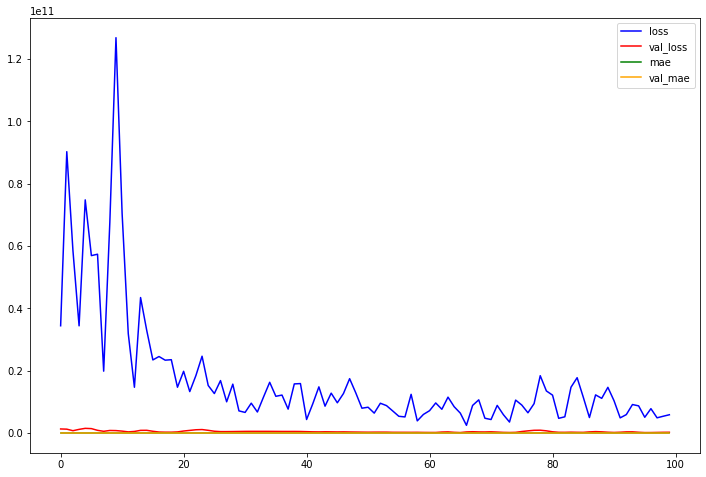

1/1 [==============================] - 0s 63ms/step - loss: 246689232.0000 - mae: 146.7355


[246689232.0, 146.73550415039062]

In [515]:
early_stopping = EarlyStopping(patience = 5, restore_best_weights= True)
history = model.fit(train, epochs = 100, validation_data = valid, callbacks = None)
plot_model_perf(history, 'mae')
model.evaluate(valid)